# Notebook #1-2: Clustering K-Means sin variable "profit"

In [34]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

# Feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler

# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")

from src import soporte_preprocesamiento as sp
from src import soporte_encoding as se
from src import soporte_scaling as ss
from src import soporte_clustering as sc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Análisis Exploratorio de los Datos (EDA)

- Como primera tarea en este proyecto, sabemos que, la empresa busca comprender mejor su base de clientes, productos y operaciones para tomar decisiones informadas que maximicen el beneficio y optimicen sus procesos.

- El primer paso será entender a los clientes, a través de modelos que nos permitan agruparlos según características similares.

- Vamos a importar los datos de origen.

In [3]:
df = pd.read_csv("../../datos/origen/Global_Superstore.csv", encoding = "latin")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


- Y utilizamos una función de exploración para entender mejor nuestro conjunto de datos.

In [4]:
exploracion = sp.exploracion_datos(df)

El número de filas es 51290 y el número de columnas es 24

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


Postal Code    80.51472
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Order Date,51290,1430,18-06-2014,135
Ship Date,51290,1464,22-11-2014,130
Ship Mode,51290,4,Standard Class,30775
Customer ID,51290,1590,PO-18850,97
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category

None

- Vemos que, tenemos aproximadamente 50 mil registros y 24 columnas. No tenemos datos nulos ni duplicados.

- El DF contiene registros de clientes y sus pedidos, incluyendo la categoría, ingreso y beneficio, datos del envío y región.

- Vamos a analizar la información de las columnas para determinar cuáles son, a priori, más interesantes para nuestro clustering de clientes.

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

- Nos quedaremos con: 

| Columna         | Descripción                                           |
|-----------------|-------------------------------------------------------|
| segment         | Segmento del cliente (ejemplo: consumidor, corporativo). |
| market         | Mercado donde se realiza la venta.         |
| category        | Categoría del producto o servicio (tecnología, muebles o suministros). |             |
| orderpriority   | Prioridad del pedido (crítica, media...).    |

- Y aplicamos el filtro.

In [6]:
df= df[["Segment", "Market", "Category", "Order Priority"]]

In [7]:
df.dtypes

Segment           object
Market            object
Category          object
Order Priority    object
dtype: object

- Visualicemos las features categóricas:

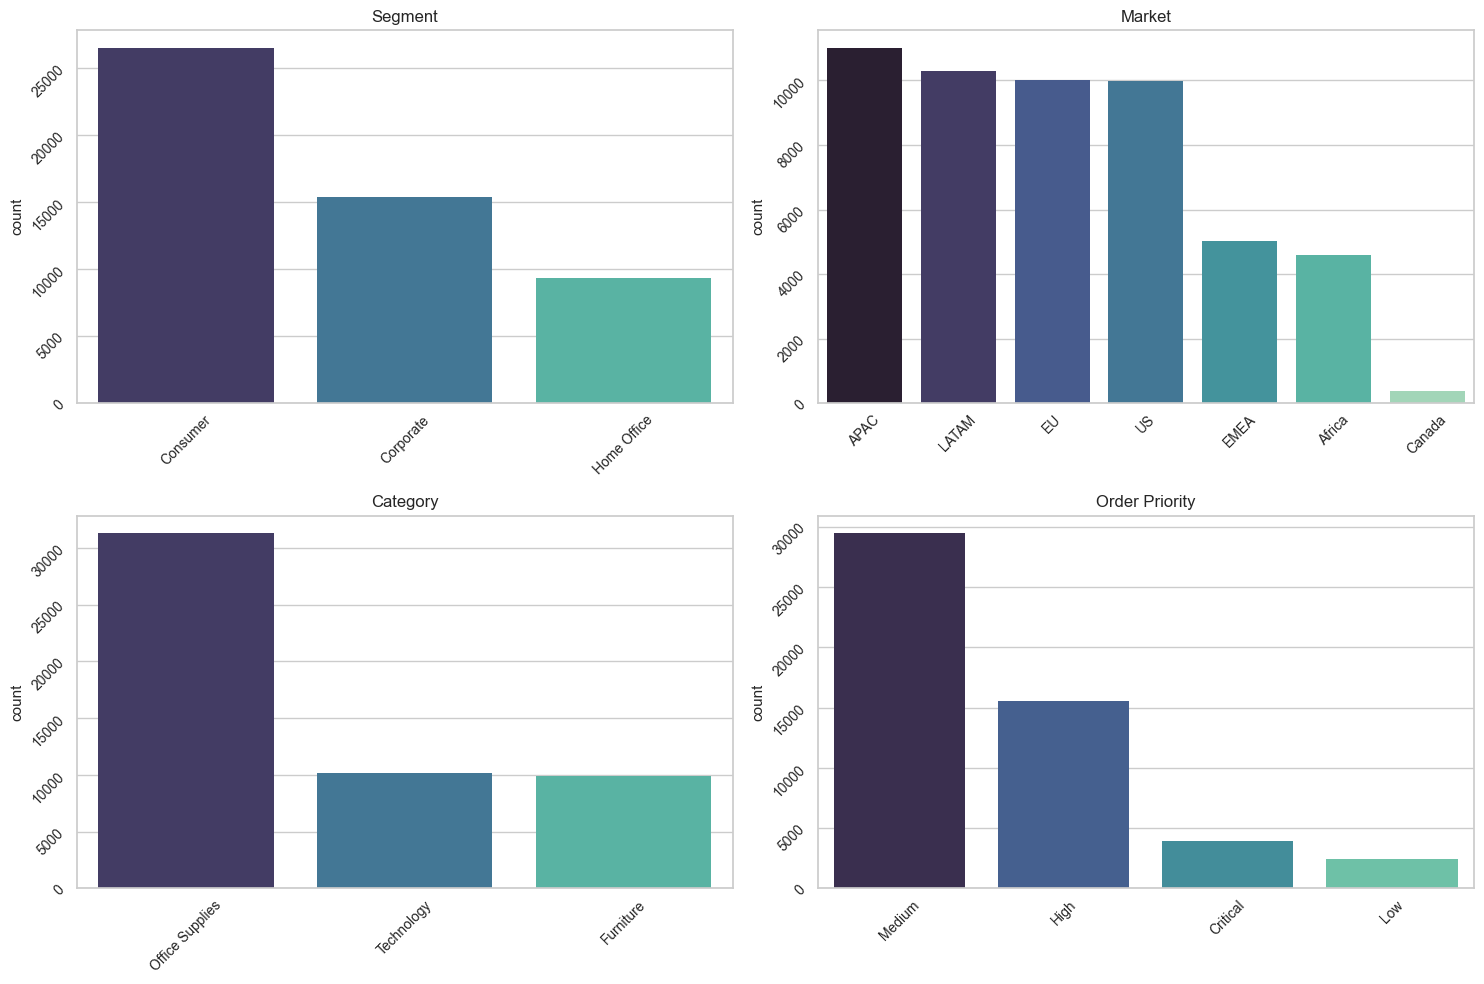

In [8]:
sp.plot_cat(df)

- Podemos ver que, tenemos categorías repartidas para todas las features, aunque predominan las ventas de suministros de oficina en la categoría de consumer, con una prioridad de orden principalmente mediana.

- En lo que respecta a los mercados, APAC, LATAM, EU y US se reparten la mayoría de ventas, con EMEA y África siendo también importantes, con ventas marginales en Canadá.

- No tenemos columnas numéricas, así que no será necesario gestionar los outliers.

## Encoding

- Dado que no tenemos variable numérica, usaremos el Frequency Encoder, que asigna pesos por cantidad de ocurrencias.

- Como primer paso definimos un diccionario de encoding, llamamos a la clase y almacenamos tanto el nuevo dataframe como el objeto de encoding.

In [9]:
diccionario_encoding = {
    "onehot": [],
    "dummies": [],
    "ordinal": {},
    "label": [],
    "frequency": ['Segment', 'Market', 'Category', 'Order Priority'],
    "target": [],
    "catboost": []
}

In [10]:
encoding = se.Encoding(dataframe=df, diccionario_encoding=diccionario_encoding, variable_respuesta="Profit")

In [11]:
ta_enc = encoding.frequency_encoding()
ta_enc.head()

,Segment,Market,Category,Order Priority
0,0.517021,0.194853,0.197719,0.076662
1,0.300819,0.214506,0.192552,0.076662
2,0.517021,0.214506,0.197719,0.573855
3,0.182160,0.194970,0.197719,0.573855
4,0.517021,0.089433,0.197719,0.076662


## Estandarización

- Para mantener la escala de nuestros datos, estandarizaremos todas las features categóricas (a pesar de estar encoded), de modo que, nuestro modelo asigne "pesos" equitativos.

- Usaremos el MinMax Scaler.

In [12]:
df_standard = ss.aplicar_escaladores(ta_enc, ['Segment', 'Market', 'Category', 'Order Priority'], '', [MinMaxScaler()], return_scaler=False)
df_standard.drop(columns=['Segment', 'Market', 'Category', 'Order Priority'], inplace= True)
df_standard.head(2)

,Segment_minmax,Market_minmax,Category_minmax,Order Priority_minmax
0,1.000000,0.905067,0.012385,0.055833
1,0.354352,1.000000,0.000000,0.055833


# Clustering

- Para crear nuestros clusters, usaremos en este caso el modelo K-Means. Primero, llamamos a la clase.

In [13]:
clustering = sc.Clustering(df_standard)

- Y buscamos el "codo" de nuestros datos, aquel punto donde el silhouette es mayor.

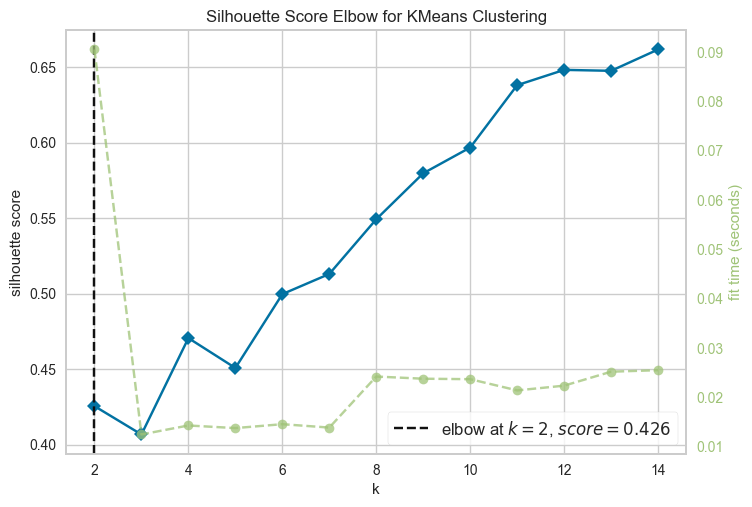

In [14]:
clustering.sacar_clusters_kmeans()

- Aunque nuestra gráfica nos indica que el mejor silhouette está en k=2, tras varias iteraciones, nos quedaremos con k=3.

In [15]:
df_kmeans, labels, cluster_model= clustering.modelo_kmeans(df_standard, 3)

- Buscamos que el silhouette sea lo más cercano a 1, mientras el DBI lo más próximo a 0, con una cardinalidad que refleje una cantidad de elementos que tenga sentido con nuestro conjunto de datos.

- En este caso, vemos que nuestro silhouette es aceptable, en 0.58, cuando el DBI se acerca a 0.64, es decir, es mayor. En lo que respecta a la cardinalidad, tenemos tres grupos, de 30 mil el primero y dos de aproximadamente 10 mil.

In [16]:
clustering.calcular_metricas(labels)

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.583359,0.64662,"{0: 31273, 1: 9650, 2: 10367}"


- Para entender si esta separación tiene algún sentido, vamos a ver dos gráficas, primero un radar plot:

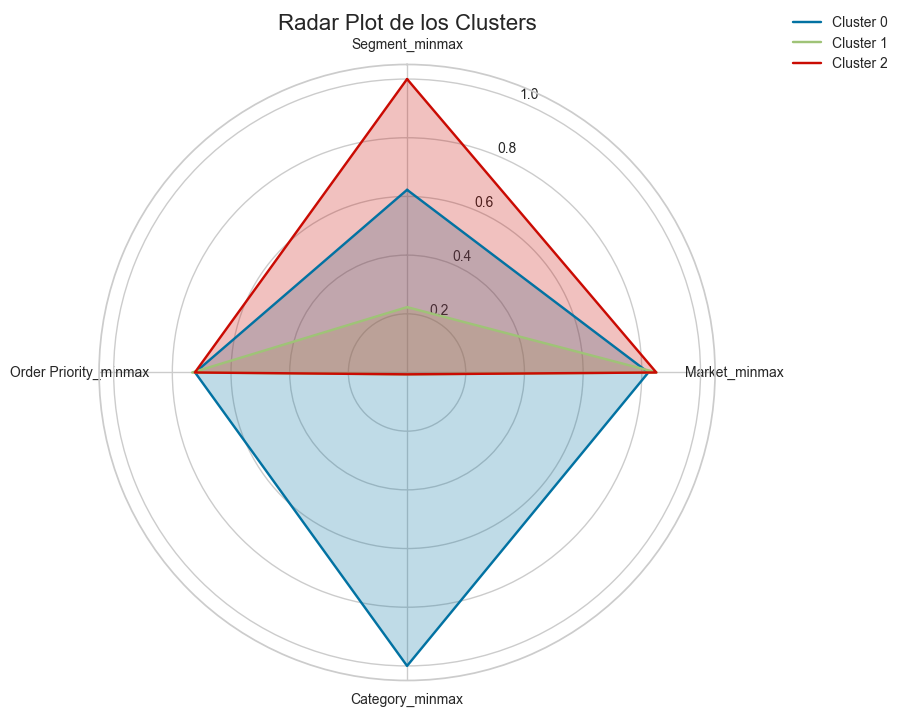

In [17]:
variables = ['Segment_minmax', 'Market_minmax', 'Category_minmax',
       'Order Priority_minmax']

clustering.radar_plot(df_kmeans, variables, "clusters_kmeans")

- Aquí, podemos ver que nuestros clusters se han dividido principalmente por el profit que generan. Para entenderlo mejor, vamos a ver un barplot.

In [20]:
df_kmeans

,Segment,Market,Category,Order Priority,clusters_kmeans
0,1.000000,0.905067,0.012385,0.055833,2
1,0.354352,1.000000,0.000000,0.055833,1
2,1.000000,1.000000,0.012385,1.000000,2
3,0.000000,0.905632,0.012385,1.000000,1
4,1.000000,0.395837,0.012385,0.055833,2
...,...,...,...,...,...
51285,0.354352,1.000000,1.000000,1.000000,0
51286,1.000000,0.905067,1.000000,1.000000,0
51287,0.000000,0.905067,1.000000,0.484172,0
51288,0.000000,0.933321,1.000000,1.000000,0


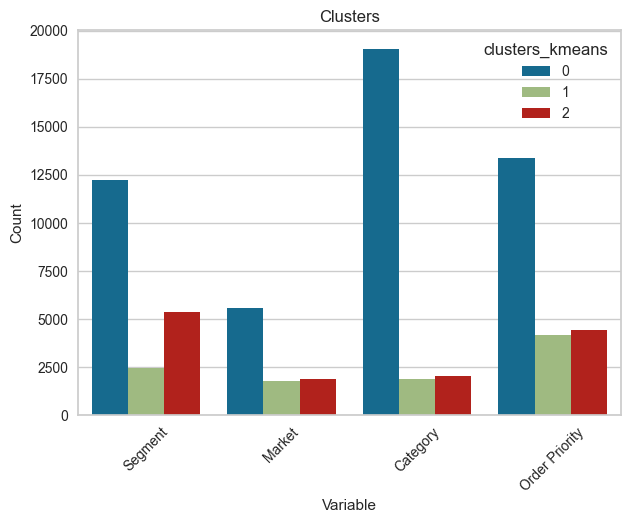

In [38]:
df_suma = df.groupby('clusters_kmeans').sum().reset_index()
df_melt = pd.melt(df_suma, id_vars='clusters_kmeans', var_name='Variable', value_name='Count')

plt.figure(figsize=(7, 5))
sns.barplot(data=df_melt, x='Variable', y='Count', hue='clusters_kmeans')
plt.xticks(rotation=45)
plt.title('Clusters')
plt.show()


## Resultados finales del clustering

- Tras probar una segunda segmentación sin la columna profit, hemos encontrado un resultado con poco sentido, como podemos ver en la gráfica, donde todos los clusters están representados en todas las variables.

- Siendo este el resultado, nos quedaremos con la primera versión, con la columna profit (notebook 1-1).